## Kaggle Survey 소개
- Kaggle이라는 Data Science Community가 있습니다. Kaggle에서는 매년 Kaggle 사용자들을 중심으로 설문조사를 시행합니다. 해당 설문조사 결과는 전세계에 뛰어난 Data Scientist들이 어떻게 일하고 어떤 것들을 공부하고 있는지 알 수 있는 좋은 자료입니다.

- 이번에 사용하는 데이터셋은 2021 Kaggle Machine Learning Survey 데이터셋을 사용 활동하는 Kaggler들에 대해 살펴보려고 합니다.

### 0. 데이터 소개
 
- 데이터의 첫번째 Row에는 각 질문이 어떤 것이었는지 대한 내용이 적혀 있습니다.

- 해당 데이터가 어떻게 수집되었는지, 활용하려면 어떻게 해야하는지 관심 있는 분들은 해당 데이터셋을 다운로드 하면 supplementary_data 폴더에서 해당 내용을 활용할 수 있습니다.

- 아래 링크에서 데이터를 다운로드 받아봅시다. 해당 데이터셋을 받기 위해서는 Kaggle에 회원가입이 되어있어야 하며, 대회 규정에 대해 동의하여야 합니다.

Source : https://www.kaggle.com/c/kaggle-survey-2021/data

### 1. 라이브러리 및 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
# %matplotlib inline

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# tqdm
from tqdm.notebook import tqdm

In [2]:
# 모든 실습 문제의 데이터 경로의 시작은 Colab Notebook/data로 통일합니다.
# 데이터 경로를 문제의 세팅대로 적고, kaggle_survey_2021_responese.csv 파일을 불러옵니다.
df = pd.read_csv('c:/reposit/data/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
df.shape

(25974, 369)

In [3]:
df.head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


### 2. 데이터 전처리

In [4]:
# 불러온 dataframe의 정보를 요약 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [5]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

In [6]:
for i in df.columns:
    print(i)

Time from Start to Finish (seconds)
Q1
Q2
Q3
Q4
Q5
Q6
Q7_Part_1
Q7_Part_2
Q7_Part_3
Q7_Part_4
Q7_Part_5
Q7_Part_6
Q7_Part_7
Q7_Part_8
Q7_Part_9
Q7_Part_10
Q7_Part_11
Q7_Part_12
Q7_OTHER
Q8
Q9_Part_1
Q9_Part_2
Q9_Part_3
Q9_Part_4
Q9_Part_5
Q9_Part_6
Q9_Part_7
Q9_Part_8
Q9_Part_9
Q9_Part_10
Q9_Part_11
Q9_Part_12
Q9_OTHER
Q10_Part_1
Q10_Part_2
Q10_Part_3
Q10_Part_4
Q10_Part_5
Q10_Part_6
Q10_Part_7
Q10_Part_8
Q10_Part_9
Q10_Part_10
Q10_Part_11
Q10_Part_12
Q10_Part_13
Q10_Part_14
Q10_Part_15
Q10_Part_16
Q10_OTHER
Q11
Q12_Part_1
Q12_Part_2
Q12_Part_3
Q12_Part_4
Q12_Part_5
Q12_OTHER
Q13
Q14_Part_1
Q14_Part_2
Q14_Part_3
Q14_Part_4
Q14_Part_5
Q14_Part_6
Q14_Part_7
Q14_Part_8
Q14_Part_9
Q14_Part_10
Q14_Part_11
Q14_OTHER
Q15
Q16_Part_1
Q16_Part_2
Q16_Part_3
Q16_Part_4
Q16_Part_5
Q16_Part_6
Q16_Part_7
Q16_Part_8
Q16_Part_9
Q16_Part_10
Q16_Part_11
Q16_Part_12
Q16_Part_13
Q16_Part_14
Q16_Part_15
Q16_Part_16
Q16_Part_17
Q16_OTHER
Q17_Part_1
Q17_Part_2
Q17_Part_3
Q17_Part_4
Q17_Part_5
Q17_Part_6
Q17_P

In [7]:
## 함수를 작성해보세요.
df.iloc[:, :15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time from Start to Finish (seconds)  25974 non-null  object
 1   Q1                                   25974 non-null  object
 2   Q2                                   25974 non-null  object
 3   Q3                                   25974 non-null  object
 4   Q4                                   25974 non-null  object
 5   Q5                                   25974 non-null  object
 6   Q6                                   25974 non-null  object
 7   Q7_Part_1                            21861 non-null  object
 8   Q7_Part_2                            5335 non-null   object
 9   Q7_Part_3                            10757 non-null  object
 10  Q7_Part_4                            4710 non-null   object
 11  Q7_Part_5                            5536

In [8]:
# 해당 데이터셋은 column이 너무 많아 전체적인 정보를 확인하기 힘듭니다.
df.iloc[:, :7].head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years


### 3. 한국사람 찾기

In [9]:
# 잘라온 데이터에서 한국은 어떤 텍스트로 표현이 되는지 찾아보세요.
# df.Q3.value_counts()
df.Q3.nunique()

67

In [10]:
# 소문자 변경
df['Q3_lower'] = df.loc[:, 'Q3'].str.lower()
df['Q3_lower'].head(3)

0    in which country do you currently reside?
1                                        india
2                                    indonesia
Name: Q3_lower, dtype: object

In [11]:
# 한국 사람들을 불러와 봅시다
df_korea = df[df['Q3_lower']=='south korea']
df_korea.shape

(359, 370)

#### 성별에 대한 분석

In [12]:
# 성별에 해당하는 column의 countplot을 그려보세요.


In [13]:
df_korea.Q2.value_counts().to_frame()

,Q2
Man,283
Woman,72
Prefer not to say,4


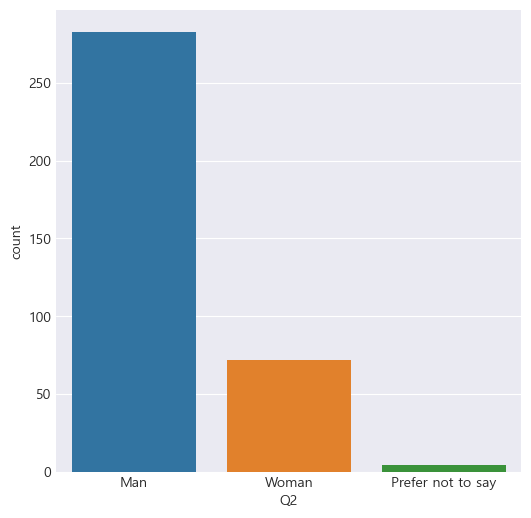

In [14]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_korea, x='Q2')
plt.show()

#### 최종학력에 대한 분석

In [15]:
df[1:].head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q3_lower
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,india
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,indonesia
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pakistan


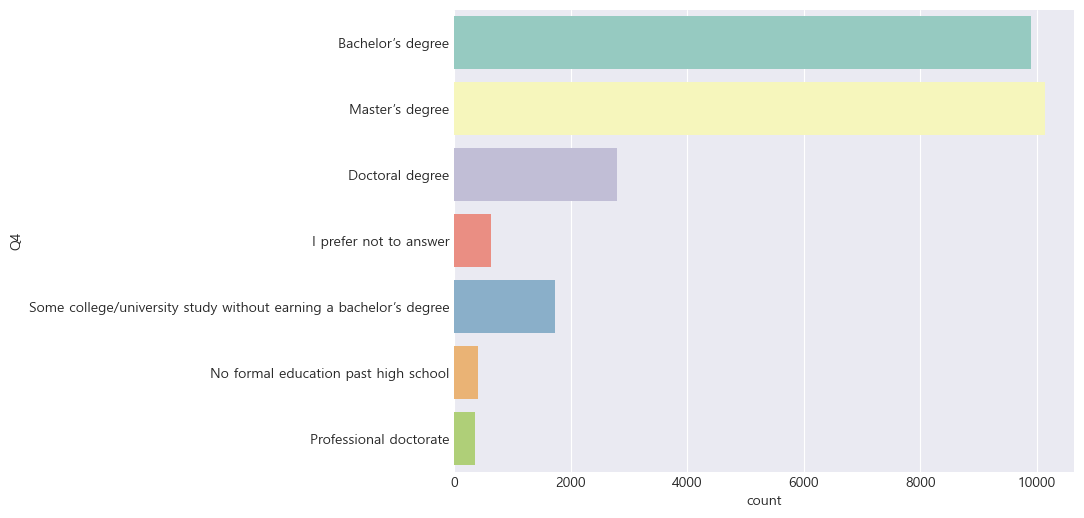

In [16]:
# 최종학력에 해당하는 column의 countplot을 그려보세요.
plt.figure(figsize=(8, 6))
sns.countplot(data=df[1:], y='Q4', palette='Set3')
plt.show()

### 4. 각 나라별 학력 통계 계산하기

- pivot table을 이용하여 나라별 통계를 계산해봅시다.

#### pivot table 만들기

In [17]:
df.loc[1:, ['Q3', 'Q4']].head(3)

,Q3,Q4
1,India,Bachelor’s degree
2,Indonesia,Master’s degree
3,Pakistan,Master’s degree


In [18]:
df_countries = pd.pivot_table(data=df.loc[1:, ['Q3', 'Q4']], index='Q3', columns='Q4', aggfunc={'Q4': 'count'}, fill_value=0)
df_countries

Q4  \
Q4                                                 Bachelor’s degree   
Q3                                                                     
Algeria                                                            3   
Argentina                                                         47   
Australia                                                         79   
Austria                                                           10   
Bangladesh                                                       172   
...                                                              ...   
Ukraine                                                           42   
United Arab Emirates                                              39   
United Kingdom of Great Britain and Northern Ir...               122   
United States of America                                         714   
Viet Nam                                                         128   

                                                                    \
Q4                                                 Doctoral degree   
Q3                                                                   
Algeria                                                         12   
Argentina                                                       17   
Australia                                                       40   
Austria                                                          8   
Bangladesh                                                      14   
...                                                            ...   
Ukraine                                                         27   
United Arab Emirates                                             8   
United Kingdom of Great Britain and Northern Ir...             107   
United States of America                                       436   
Viet Nam                                                         9   

                                                                           \
Q4                                                 I prefer not to answer   
Q3                                                                          
Algeria                                                                 0   
Argentina                                                               3   
Australia                                                               1   
Austria                                                                 1   
Bangladesh                                                              7   
...                                                                   ...   
Ukraine                                                                 8   
United Arab Emirates                                                    0   
United Kingdom of Great Britain and Northern Ir...                      4   
United States of America                                               30   
Viet Nam                                                               20   

                                                                    \
Q4                                                 Master’s degree   
Q3                                                                   
Algeria                                                         24   
Argentina                                                       78   
Australia                                                      118   
Austria                                                         24   
Bangladesh                                                      88   
...                                                            ...   
Ukraine                                                         93   
United Arab Emirates                                            53   
United Kingdom of Great Britain and Northern Ir...             263   
United States of America                                      1235   
Viet Nam                                                        61   

                

#### 특정 국가 가져오기

In [19]:
df.Q4[0]

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

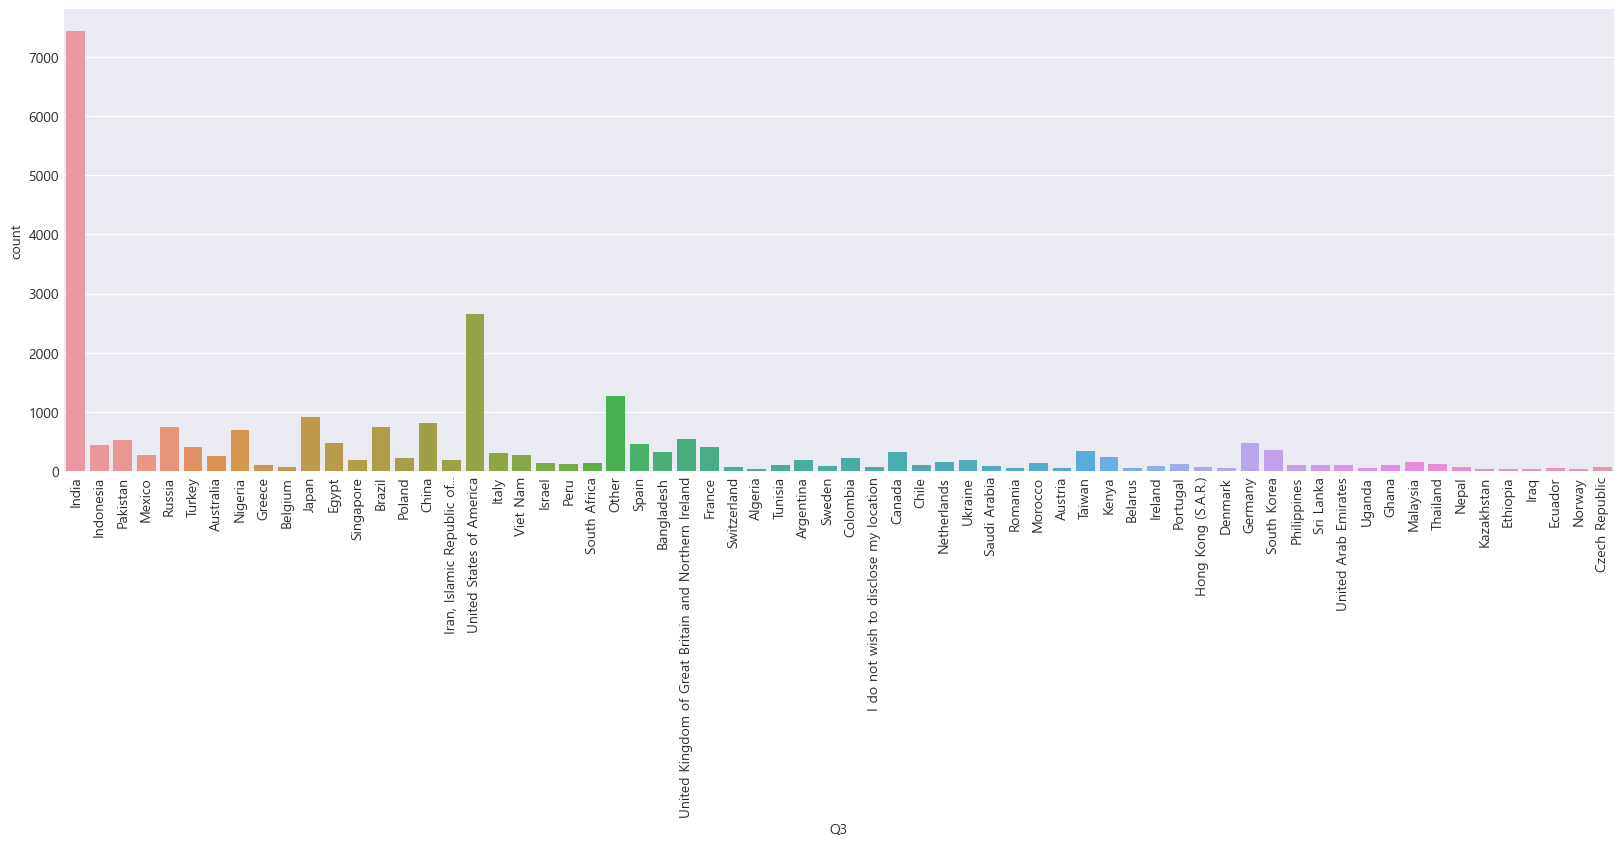

In [20]:
# 미국과 캐나다를 가져와봅시다.
plt.figure(figsize=(20, 6))
sns.countplot(data=df[1:], x='Q3')
plt.xticks(rotation=90)
plt.show()

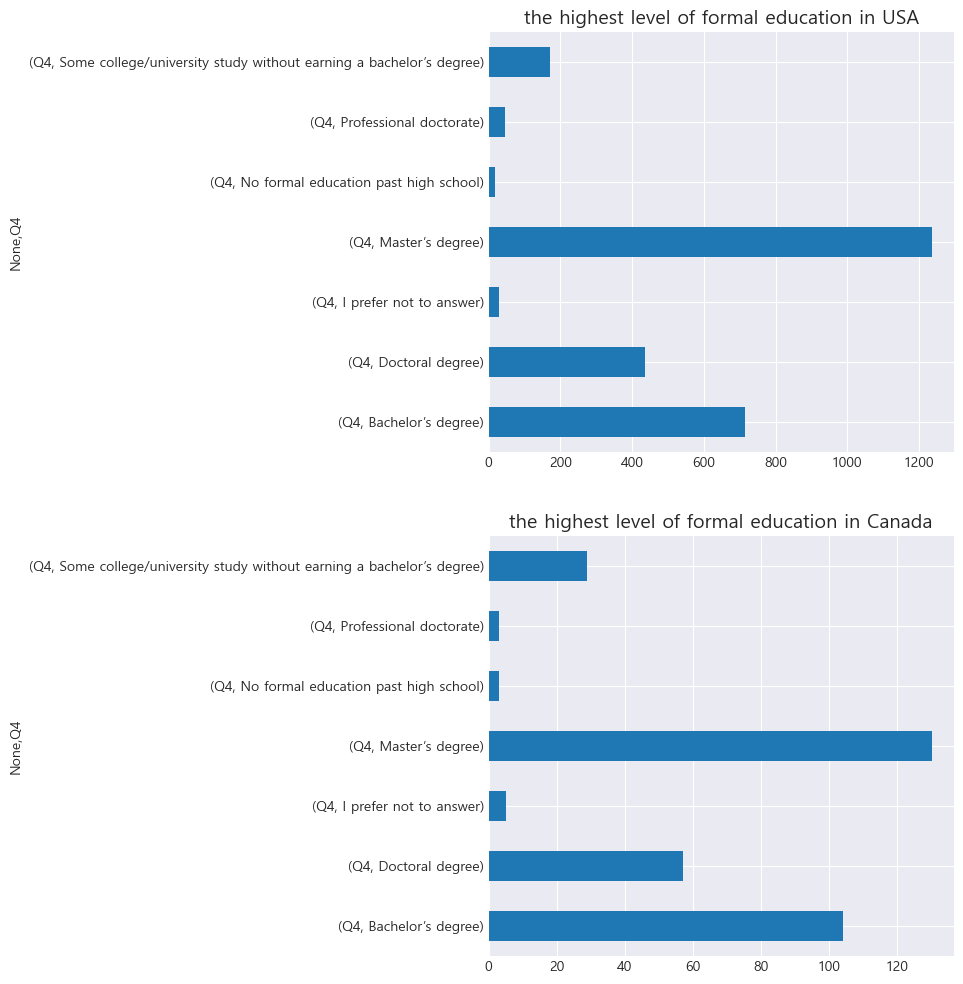

In [21]:
usa = df_countries.loc['United States of America']
canada = df_countries.loc['Canada']

plt.figure(figsize=(6, 12))
plt.subplot(2, 1, 1)
usa.plot(kind='barh')
plt.title('the highest level of formal education in USA', fontsize=14)

plt.subplot(2, 1, 2)
canada.plot(kind='barh')
plt.title('the highest level of formal education in Canada', fontsize=14)
plt.show()

In [22]:
df1 = df.iloc[1:][['Q3', 'Q4']].copy()
df1.shape

(25973, 2)

In [23]:
df1.Q3.nunique()

66

In [24]:
df_eng = df1[(df1['Q3']=='Canada') | (df1['Q3']=='United States of America')]
df_eng.shape

(2981, 2)

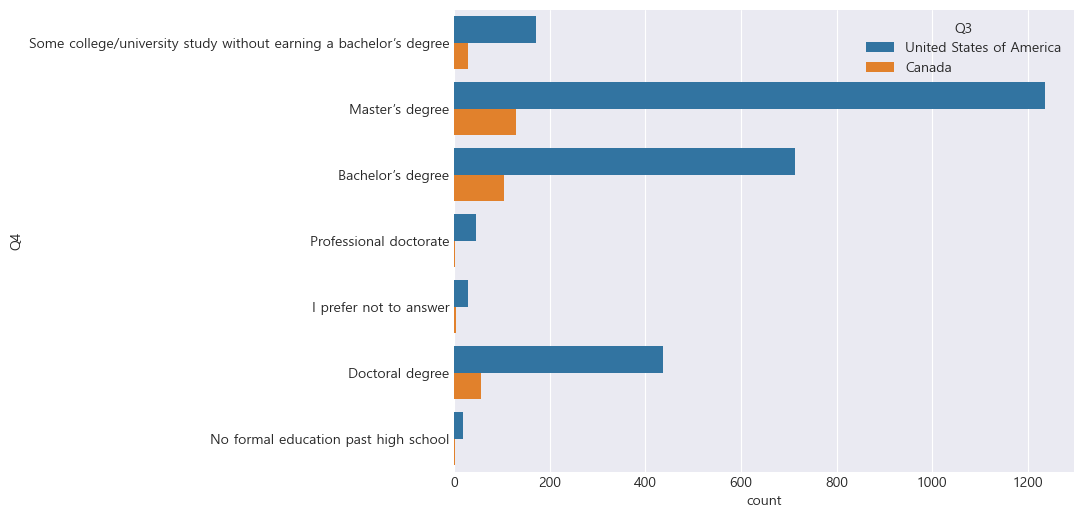

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eng, y='Q4', hue='Q3')
plt.show()

### 5. 프로그래밍 언어 선호도 분석

- 어떤 column을 가져와야 할까요?

- Q7과 관련된 column들은 어떻게 다 가져올까요?

#### 프로그래밍 언어 선호도를 포함하는 column들을 불러오기

In [26]:
df.iloc[:, 7:].head(3)
# Q7만 가져올 수 없을까?

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q3_lower
0,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",in which country do you currently reside?
1,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,india
2,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,indonesia


In [27]:
df.columns[df.columns.str.startswith('Q7')]

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

In [28]:
Q7_col = df.columns[df.columns.str.startswith('Q7')].to_list()
df[['Q3'] + Q7_col].head(3)

,Q3,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
0,In which country do you currently reside?,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...
1,India,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indonesia,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 언어별 정보가 합쳐진 DataFrame 만들기

In [29]:
df[Q7_col][1:]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,Python,NaN,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25970,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
q7_list = []

for _, row in tqdm(df[Q7_col][1:].iterrows()):
#     print(j[~j.isnull()].values)
    q7_list.append(row[~row.isnull()].values)
    
q7_list[:2]

0it [00:00, ?it/s]

[array(['Python', 'R'], dtype=object),
 array(['SQL', 'C', 'C++', 'Java'], dtype=object)]

In [31]:
df['PL'] = ['PL'] + q7_list
df.iloc[:, -1].head()

0                     PL
1            [Python, R]
2    [SQL, C, C++, Java]
3    [Python, C++, Java]
4               [Python]
Name: PL, dtype: object

#### 한국인 응답자의 데이터만 뽑아보세요.

In [32]:
df_kor = df.loc[df.Q3=='South Korea', ['Q3'] + Q7_col]
df_kor.head(3)

,Q3,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
276,South Korea,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,South Korea,Python,NaN,SQL,NaN,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN
410,South Korea,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### countplot을 그리기

In [33]:
# x축을 나이대 별로 정렬하여 countplot을 출력해보세요.


In [34]:
q7_list_kor = []

for _, row in df_kor[Q7_col].iterrows():
#     print(row[~row.isnull()].values)
#     break
    
    q7_list_kor.append(row[~row.isnull()].values)

q7_list_kor[:5]

[array(['Python'], dtype=object),
 array(['Python', 'SQL', 'Java', 'Javascript'], dtype=object),
 array(['Python'], dtype=object),
 array(['Java', 'Javascript'], dtype=object),
 array(['Python', 'C', 'C++'], dtype=object)]

In [35]:
q7_list_kor = []

for _, row in df_kor[Q7_col].iterrows():
#     print(row[~row.isnull()].values)
#     break
    
    q7_list_kor.append(row[~row.isnull()].values.tolist())

q7_list_kor[:5]

[['Python'],
 ['Python', 'SQL', 'Java', 'Javascript'],
 ['Python'],
 ['Java', 'Javascript'],
 ['Python', 'C', 'C++']]

In [36]:
from collections import Counter

q7_data = []

for row in q7_list_kor:
    q7_data += row

len(q7_data)

807

In [37]:
counter = Counter(q7_data)
counter

Counter({'Python': 303,
         'SQL': 89,
         'Java': 57,
         'Javascript': 42,
         'C': 81,
         'C++': 68,
         'MATLAB': 38,
         'R': 89,
         'Bash': 14,
         'None': 3,
         'Other': 15,
         'Swift': 6,
         'Julia': 2})

In [38]:
df_cnt = pd.DataFrame({'Languages': counter.keys(), 'Count': counter.values()})
df_cnt.head()

,Languages,Count
0,Python,303
1,SQL,89
2,Java,57
3,Javascript,42
4,C,81


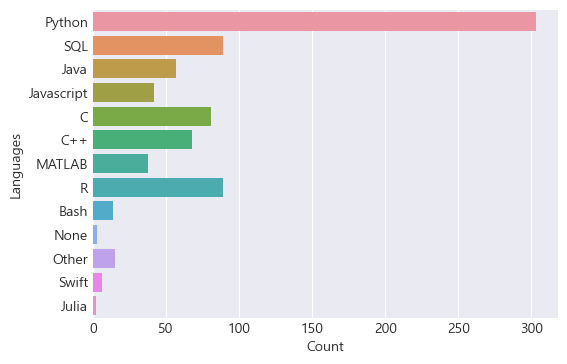

In [39]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_cnt, x='Count', y='Languages')
plt.show()